**Table of contents**<a id='toc0_'></a>    
- [탐색적 분석](#toc1_)    
  - [기술통계](#toc1_1_)    
    - [질적 변수 (Category 변수)](#toc1_1_1_)    
      - [도수 분포표와 상대도수 분포표](#toc1_1_1_1_)    
      - [상관계수](#toc1_1_1_2_)    
    - [양적 변수](#toc1_1_2_)    
      - [도수 분포표와 상대도수 분포표](#toc1_1_2_1_)    
      - [위치적 대표값](#toc1_1_2_2_)    
      - [왜도와 첨도](#toc1_1_2_3_)    
      - [상관계수 : 피어슨의 적률상관계수](#toc1_1_2_4_)    
      - [양적변수 시각화 : 히스토그램](#toc1_1_2_5_)    
      - [양적변수 시각화 : Ogive](#toc1_1_2_6_)    
      - [양적변수 시각화 : Box Plot](#toc1_1_2_7_)    
      - [양적변수 시각화 : Scatter Plot](#toc1_1_2_8_)    
    - [기타 변수](#toc1_1_3_)    
- [컬럼 취합](#toc2_)    
- [스케일링](#toc3_)    
- [(참고) 선형 분류 예측](#toc4_)    
    - [이진 분류를 위한 결정 경계 (decision boundary)](#toc4_1_1_)    
  - [모델 훈련 및 성능 측정](#toc4_2_)    
    - [목적 변수](#toc4_2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[탐색적 분석](#toc0_)

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['font.family'] = 'Malgun Gothic' # AppleGothic
plt.rcParams['font.size'] = 10

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

타이타닉 탑승자 개인별 데이터를 보고 생존 여부를 예측하는 예제 데이터

- Survival - 생존여부(타겟변수 y): 0 = No, 1 = Yes
- Pclass - 티켓 등급: 1 = 1st, 2 = 2nd, 3 = 3rd
- Sex - 성별: male, female
- Age - 나이
- SibSp - 동승한 형제, 배우자 수
- Parch - 부모와 자녀의 수
- Ticket - 티켓 번호
- Fare - 승선 요금
- Cabin - 캐빈(객실) 번호
- Embarked - 승선한 항구: C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/blueage98/ML/main/titanic/titanic_train.csv")
print(data.shape)
data[:3]

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
# 사본 사용
df = data.copy()

## <a id='toc1_1_'></a>[기술통계](#toc0_)
- info를 사용
- 컬럼 이름, 컬럼수(특성 수), 샘플수를 파악한다
- 카테고리형 타입(object)과 숫자형 타입(int, float)을 파악한다
 - 숫자 타입도 연속적인 값을 갖는 아나로그형과 카테고리형이 있다

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 숫자형 데이터의 기본 통계값 보기
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 컬럼명 보기
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

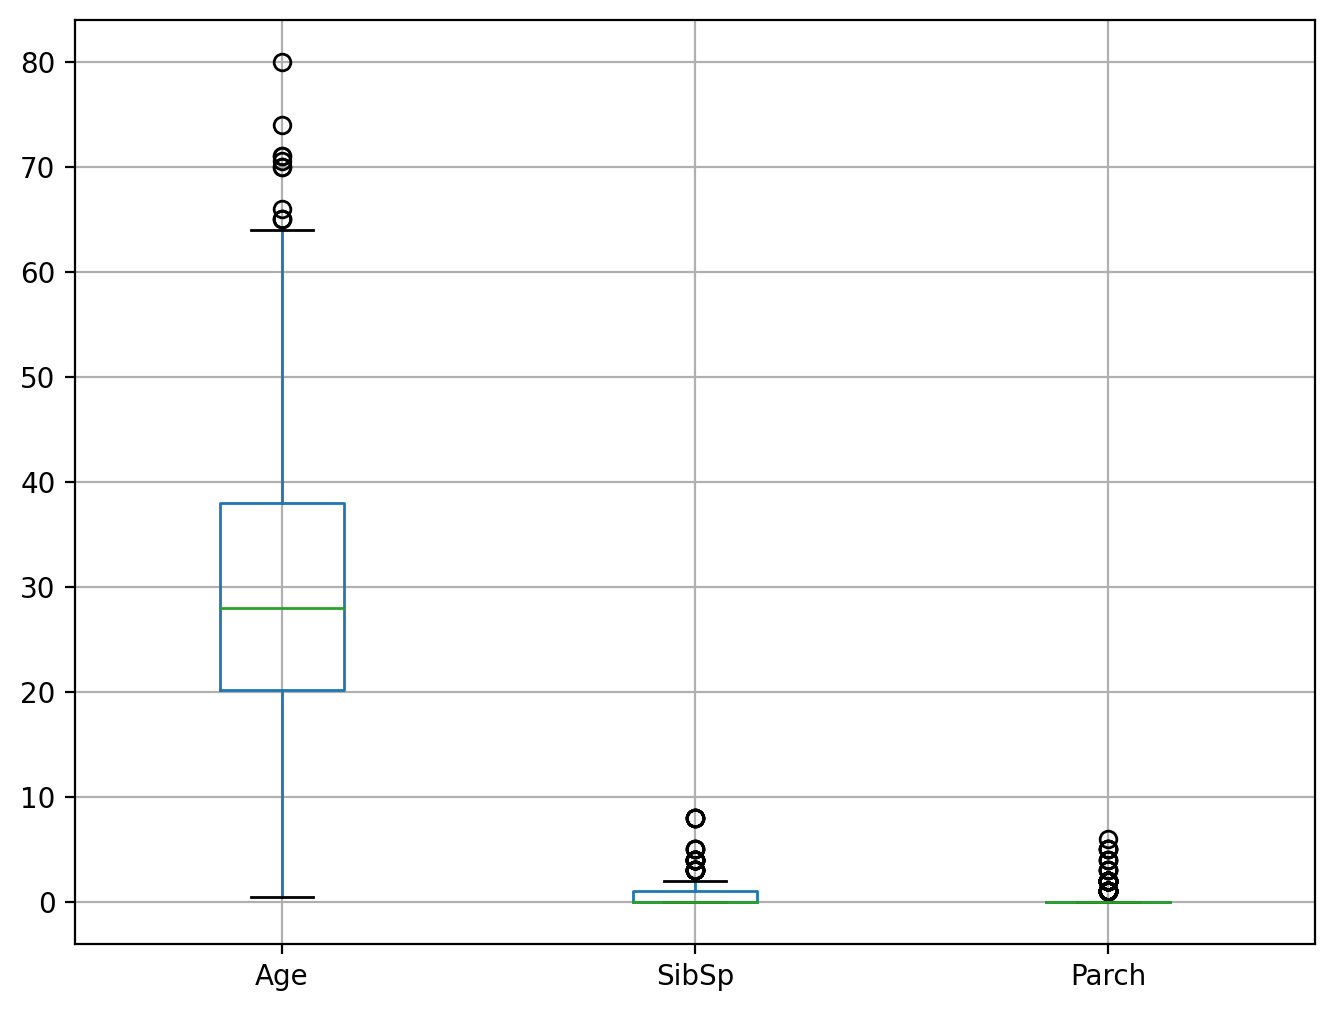

In [8]:
# 특정 컬럼만 보기
plt.figure(figsize=(8,6))
df[['Age', 'SibSp','Parch']].boxplot()

In [9]:
# 컬럼별 결측치 갯수
# 결측치가 있는 컬럼이 3개인 것을 알 수 있다
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### <a id='toc1_1_1_'></a>[질적 변수 (Category 변수)](#toc0_)

#### <a id='toc1_1_1_1_'></a>[도수 분포표와 상대도수 분포표](#toc0_)

In [10]:
#도수 열 추가
freq = pd.DataFrame(df.Survived.value_counts())
freq = freq.rename(columns={'count':'도수'})

#상대도수 열 추가
freq['상대도수'] = df.Survived.value_counts(normalize=True)

print(freq)

           도수      상대도수
Survived               
0         549  0.616162
1         342  0.383838


#### <a id='toc1_1_1_2_'></a>[상관계수](#toc0_)
아래 두 상관계수는 질적 변수 중에서도 서열척도에 대한 상관관계를 보여준다.
- 스피어만 순위상관 계수
- 켄달의 Tau

상관계수에서의 가설검정에서 모상관계수를 0으로 가정한다.
- 귀무가설은 표본집단의 상관계수는 모상관계수와 차이가 없다.
- 대립가설은 표본집단의 상관계수는 모상관계수와 차이가 있다.  (즉, 상관이 있다.)

상관계수의 표본집단 평균이 이루는 모집단은 0으로 수렴하므로, 0을 중심으로 하는 정규분포를 이룬다.
따라서 문제의 표본집단의 평균이 모집단으로부터 나온 것이라면 유의수준 5%에서 95% 확률 범위 안에 들어올 것이다.
만약 95% 확률 범위 안에 들어오지 않는다면 모집단이 아닌 다른 집단에서 온 것으로 확정할 수 있다.
모집단은 상관계수가 0인 집단이므로 모집단이 아닌 다른 집단에서 왔다는 의미는 상관계수가 0이 아닌 집단에서 왔다는 의미다.
따라서, p-value는 문제의 표본집단이 모집단 내에서 갖는 확률값이 된다.

In [11]:
from scipy.stats import spearmanr, kendalltau

corrs, ps = spearmanr(df.Survived, df.Pclass)
print("스피어만 상관계수 : {:.3f}, p-value : {:.3f}".format(corrs, ps))

corrk, pk = kendalltau(df.Survived, df.Pclass)
print("켄달타우 상관계수: {:.3f}, p-value : {:.3f}".format(corrk, pk))

스피어만 상관계수 : -0.340, p-value : 0.000
켄달타우 상관계수: -0.324, p-value : 0.000


### <a id='toc1_1_2_'></a>[양적 변수](#toc0_)


#### <a id='toc1_1_2_1_'></a>[도수 분포표와 상대도수 분포표](#toc0_)
- 일반적인 계급의 수는 5~20
- 일반적인 계급의 크기는 (최대값-최소값)/계급수

In [12]:
# 나이를 5개의 구간으로 나누고, 각 승객의 나이가 속한 구간들을 뽑아낸다.
#table = pd.cut(df.Age, bins=5)
table = pd.cut(df.Age, bins=[0, 20, 40, 60, float('inf')], right=False) #right=False면 왼쪽 이상, 오른쪽 미만

# 위 구간들의 열에서 각 구간들의 도수를 뽑아낸다.
freq1 = table.value_counts().reset_index()

# 열의 이름을 계급/도수로 바꾸고, 계급 열을 기준으로 정렬한다.
freq1 = freq1.rename(columns={'Age':'계급', 'count':'도수'}).sort_values(by='계급')

# 상대도수열을 추가한다.
# freq1['상대도수'] = freq1.도수 / freq1.도수.sum()
freq1['상대도수'] = freq1.도수.apply(lambda x : x / freq1.도수.sum())

freq1

,계급,도수,상대도수
1,"[0.0, 20.0)",164,0.229692
0,"[20.0, 40.0)",387,0.542017
2,"[40.0, 60.0)",137,0.191877
3,"[60.0, inf)",26,0.036415


#### <a id='toc1_1_2_2_'></a>[위치적 대표값](#toc0_)

In [13]:
print("중위수: ", df.Fare.median())
print("최빈값: ", df.Fare.mode()[0]) #최빈값이 여러 개 나오면 첫번째 것만 표시
print("1 사분위 수: ", df.Fare.quantile(q=0.25))
print("2 사분위 수: ", df.Fare.quantile(q=0.50))
print("3 사분위 수: ", df.Fare.quantile(q=0.75))
print("50 백분위 수: ", np.percentile(df.Fare, 50))

중위수:  14.4542
최빈값:  8.05
1 사분위 수:  7.9104
2 사분위 수:  14.4542
3 사분위 수:  31.0
50 백분위 수:  14.4542


#### <a id='toc1_1_2_3_'></a>[왜도와 첨도](#toc0_)
- 왜도
    - 양수면 왼쪽으로 치우친 분포
    - 음수면 오른쪽에 치우친 분포
- 첨도
    - 3보다 크다면 정규분포보다 뾰족하고 꼬리가 얇다
    - 3보다 작으면 정규분포보다 뾰족하지 않은 대신 꼬리가 두터운 모양

In [14]:
print("왜도 : %.3f, 첨도 : %.3f" %(df.Fare.skew(), df.Fare.kurt()))

왜도 : 4.787, 첨도 : 33.398


#### <a id='toc1_1_2_4_'></a>[상관계수 : 피어슨의 적률상관계수](#toc0_)

In [24]:
from scipy.stats import pearsonr

tempdf = df[['Age', 'Fare']].copy()
tempdf.dropna(axis=0, inplace=True)

corr, p = pearsonr(tempdf.Age, tempdf.Fare)
print("피어슨의 상관계수 : {:.3f}, p-value : {:.3f}".format(corr, p))

피어슨의 상관계수 : 0.096, p-value : 0.010


#### <a id='toc1_1_2_5_'></a>[양적변수 시각화 : 히스토그램](#toc0_)

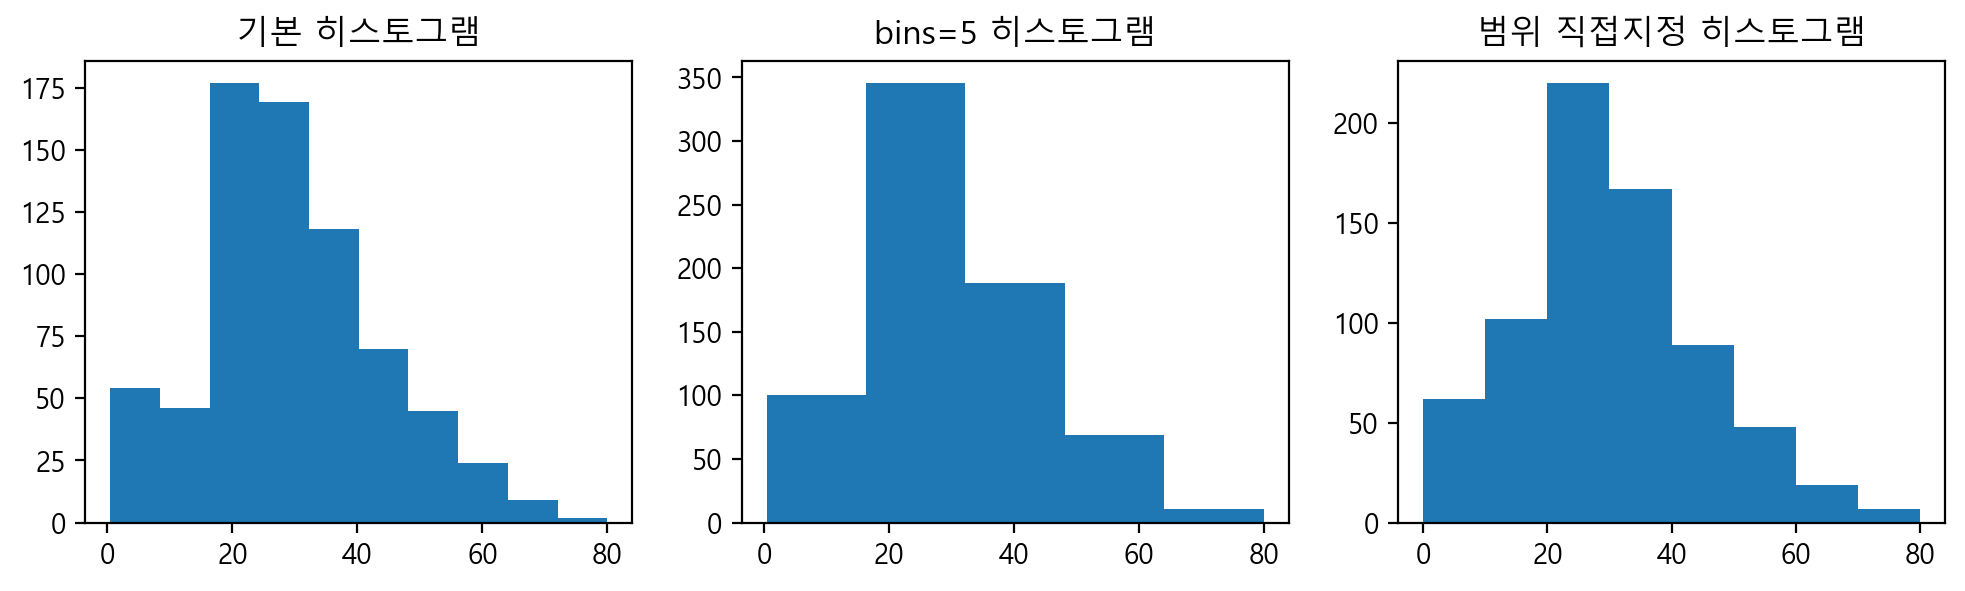

In [71]:
fig, ax = plt.subplots(1,3, figsize=(12,3))

ax[0].hist(df.Age)
ax[0].set_title("기본 히스토그램")
ax[1].hist(df.Age, bins=5)
ax[1].set_title("bins=5 히스토그램")
ax[2].hist(df.Age, bins=[i for i in range(0, 90, 10)])
ax[2].set_title("범위 직접지정 히스토그램")

plt.show()

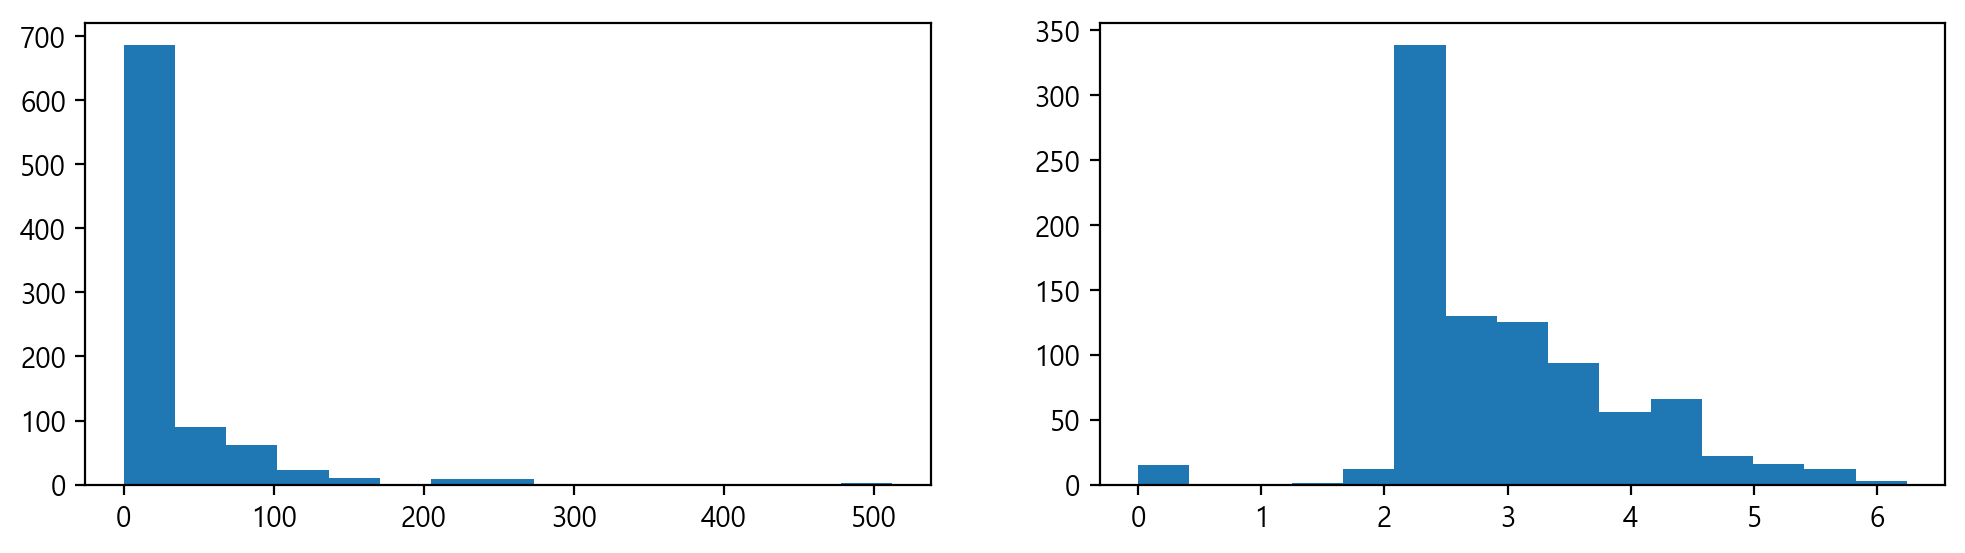

In [72]:
# 돈과 관련된 값은 로그변환을 하여 선형적인 값으로 변환하는 경우가 많다
# 로그를 취하면 정규 분포처럼 보인다 (log-normal 분포)
fig, ax = plt.subplots(1,2, figsize=(12, 3))

ax[0].hist(df.Fare, bins=15)
ax[1].hist(np.log(df.Fare+1), bins=15); 

plt.show()

#### <a id='toc1_1_2_6_'></a>[양적변수 시각화 : Ogive](#toc0_)

[도수분포표]
          계급   도수  누적도수   계급값
4   (0, 10]   64    64   5.0
2  (10, 20]  115   179  15.0
0  (20, 30]  230   409  25.0
1  (30, 40]  155   564  35.0
3  (40, 50]   86   650  45.0
5  (50, 60]   42   692  55.0
6  (60, 70]   17   709  65.0
7  (70, 80]    5   714  75.0 



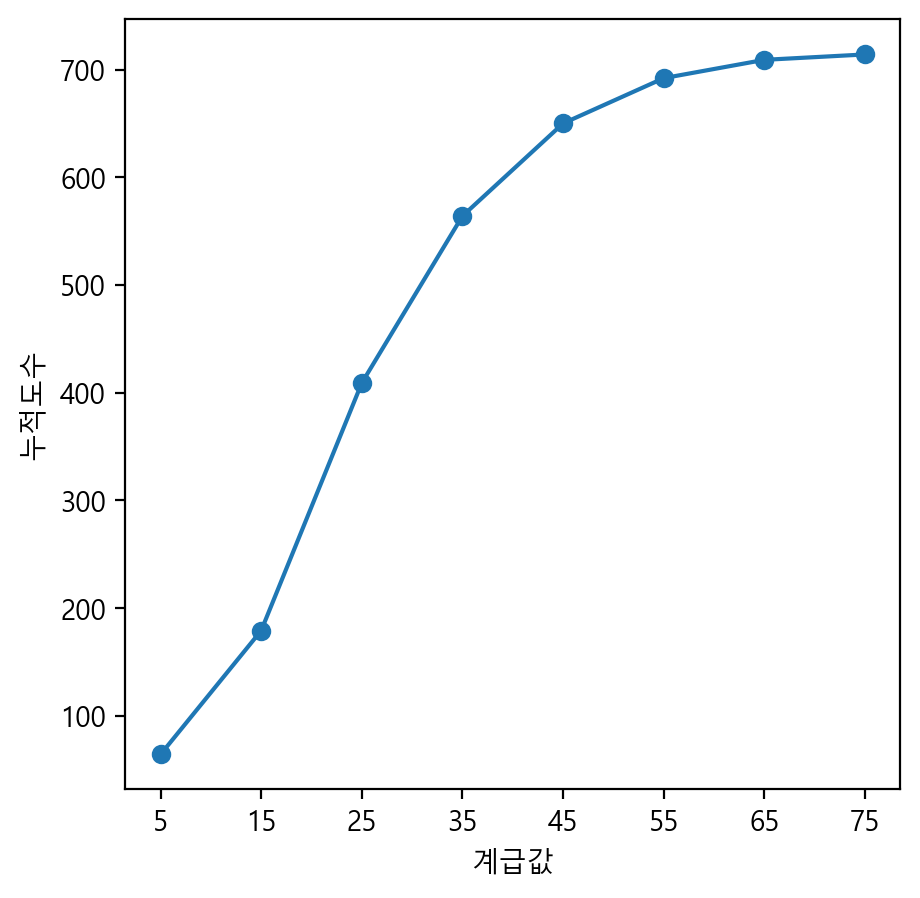

In [73]:
from pandas import cut

result1 = cut(df.Age, bins=[i for i in range(0, 90, 10)])

#value_counts를 쓸 때는 index를 없애고 -> column 이름을 계급과 도수로 변경 -> 계급으로 정렬
freq1 = pd.DataFrame(result1).value_counts().reset_index().rename(columns={'Age':'계급', 'count':'도수'}).sort_values(by='계급')
freq1['누적도수'] = freq1.도수.cumsum()
freq1['계급값'] = freq1.계급.apply(lambda x: np.median([x.left, x.right]))

plt.plot(freq1.계급값, freq1.누적도수, marker='o')
plt.xticks(freq1.계급값)
plt.xlabel('계급값')
plt.ylabel('누적도수')

print('[도수분포표]\n', freq1, '\n')
plt.show()

#### <a id='toc1_1_2_7_'></a>[양적변수 시각화 : Box Plot](#toc0_)

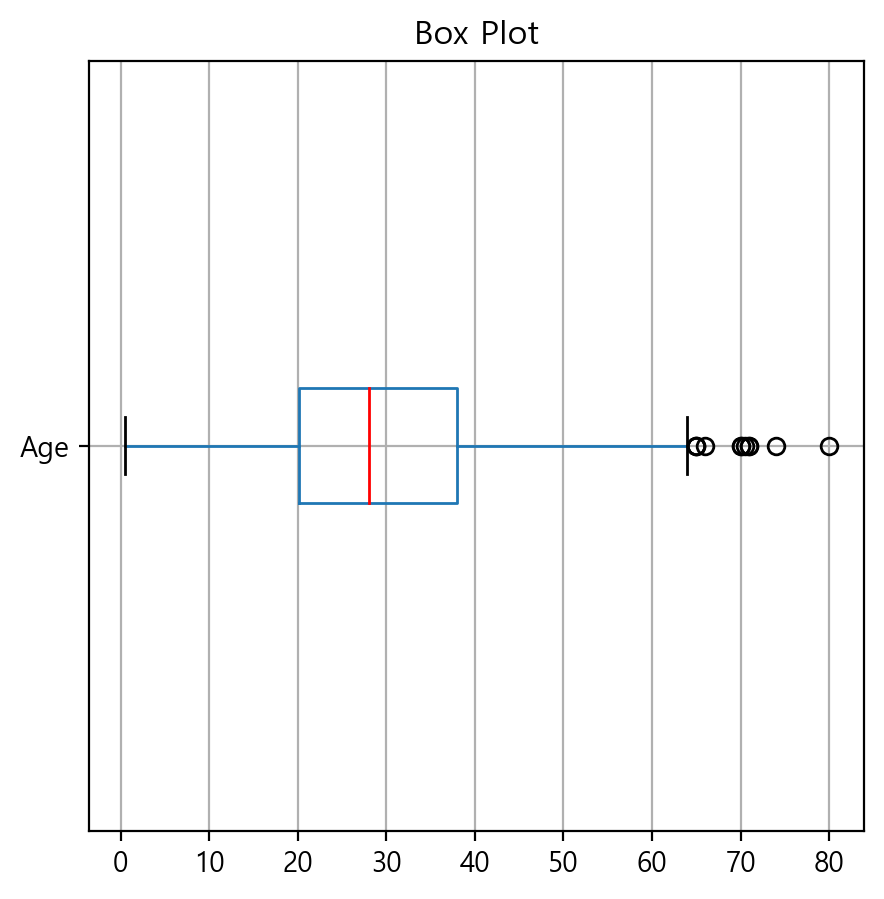

In [70]:
df[['Age']].boxplot(vert=False, medianprops={'color':'red'})

plt.title('Box Plot')
plt.yticks(ticks=[1], labels=['Age'])
plt.show()

#### <a id='toc1_1_2_8_'></a>[양적변수 시각화 : Scatter Plot](#toc0_)

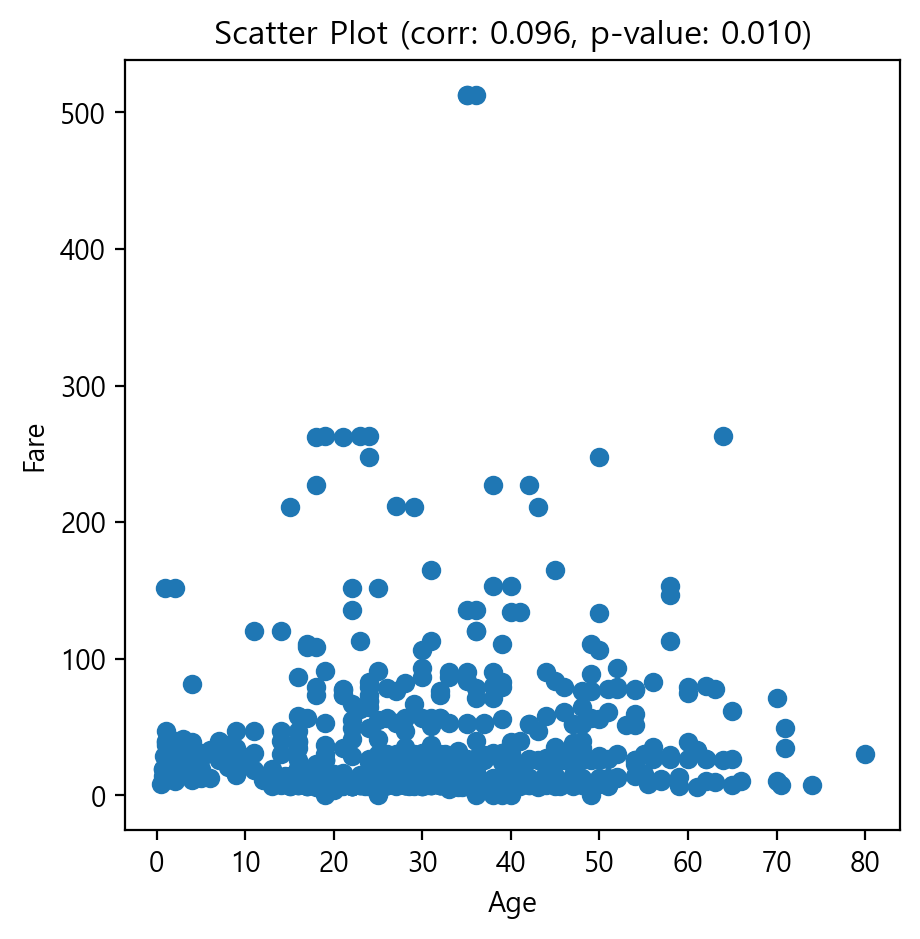

In [77]:
temp = df[['Age', 'Fare']].dropna(axis=0)

plt.scatter(temp.Age, temp.Fare)
plt.title('Scatter Plot (corr: %.3f, p-value: %.3f)' %(pearsonr(temp.Age, temp.Fare)))
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

### <a id='toc1_1_3_'></a>[기타 변수](#toc0_)
- 형제, 동반자, 부모, 자녀 수 등은 다양하게 분포하며 분석에 그대로 사용할 수 있을 것이다
- 즉, 별도의 변환은 하지 않는다

In [ ]:
# 형제, 동반자 수 종류
df.SibSp.value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
# 부모, 자녀 수 종류
df.Parch.value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

# <a id='toc2_'></a>[컬럼 취합](#toc0_)
- 원핫 인코딩으로 만든 컬럼들을 모두 합친다

In [ ]:
# 사용할 아나로그 변수 컬럼들을 먼저 선택한다
X = df[['Age', 'SibSp', 'Parch', 'Fare',]]
X[:3]

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250


In [ ]:
# 요금은 로그 변환한 값을 사용한다 (오류 발생을 피하기 위해서 작은 값을 더해준다)
X.Fare = np.log(X.Fare +0.1)
X[:3]

/Users/hwa-kim/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Age,SibSp,Parch,Fare
0,22.0,1,0,1.994700
1,38.0,1,0,4.268064
2,26.0,0,0,2.082562


In [ ]:
# 원핫 인코딩한 카테고리 변수 컬럼들을 가로로 붙인다 (axis=1)
X = pd.concat([X, df_embarked, df_class, df_sex], axis=1)
X[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,22.0,1,0,1.994700,0,0,1,0,0,1,0,1
1,38.0,1,0,4.268064,1,0,0,1,0,0,1,0
2,26.0,0,0,2.082562,0,0,1,0,0,1,1,0


# <a id='toc3_'></a>[스케일링](#toc0_)
- 일반적으로 연속형, 아나로그 값은 스케일링을 하는 것이 안전하다
- 결정트리, 랜덤 포레스트 등 트리 계열의 모델에서는 스케일링을 하지 않아도 되지만 선형모델, 신경망 모델 등에서 스케일링을 해야 잘 동작한다
- 기본적으로는 표준 스케일링을 하며, 최대값과 최소값의 범위가 분명히 한정되어 있을 때는 min-max 스케일링도 사용한다

In [ ]:
# 표준 스케일링 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['Age', 'SibSp', 'Parch', 'Fare']] = scaler.fit_transform(X[['Age', 'SibSp', 'Parch', 'Fare']])

In [ ]:
X[:3]

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3,Sex_female,Sex_male
0,-0.589620,0.431350,-0.474326,-0.755613,0,0,1,0,0,1,0,1
1,0.644848,0.431350,-0.474326,1.232311,1,0,0,1,0,0,1,0
2,-0.281003,-0.475199,-0.474326,-0.678783,0,0,1,0,0,1,1,0


# <a id='toc4_'></a>[(참고) 선형 분류 예측](#toc0_)
- 개인별 정보를 보고 이 사람의 생존 여부를 예측하는 선형 분류 모델을 만들어 보겠다
- 분류에 대해서는 "머신러닝"에서 자세히 설명한다

### <a id='toc4_1_1_'></a>[이진 분류를 위한 결정 경계 (decision boundary)](#toc0_)
- 하나의 변수만 사용하는 경우 선형분류 결정 경계: $x_{1} > b$  
- 두 개의 변수를 사용하는 경우 선형분류 결정 경계: $a_{1}x_{1}+a_{2}x_{2}+b >0$  
     > $x_{2} > -$$a_{1}\over a_{2}$ $x_{1} - $$b\over{a_{2}}$


<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-01-09%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%205.19.06.png?raw=1" width=550 align='left'>


## <a id='toc4_2_'></a>[모델 훈련 및 성능 측정](#toc0_)


### <a id='toc4_2_1_'></a>[목적 변수](#toc0_)
- 분류 예측 대상 데이터로서 여기서는 생존 여부 데이터인 Survived 컬럼의 값이다

In [ ]:
y = df.Survived
y.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [ ]:
# 선형 분류 함수로 SGDClassifier를 사용
from sklearn.linear_model import SGDClassifier
model = SGDClassifier() # 모델 생성

In [ ]:
# 전체 데이터를 훈련 데이터와 검증 데이터로 랜덤하게 나눈다 (디폴트 비율은 75%: 25%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=19)

<img src="https://raw.githubusercontent.com/data-labs/image/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202020-12-29%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%2011.45.47.png?raw=1" width=300 align='left'>

In [ ]:
# 훈련 및 검증 데이터 갯수
len(X_train), len(X_test)

(666, 223)

In [ ]:
# 모델을 학습시킨다 (학습 데이터 사용)
model.fit(X_train, y_train)
# 검증 데이터를 사용하여 모델의 성능을 본다 - score 함수는 정확도 (accuracy)를 알려준다
model.score(X_test, y_test)

0.7668161434977578

In [ ]:
# 선형 모델의 가중치를 본다
# 각 특성이 얼마나 중요하게 반영되었는지를 나타낸다
model.coef_

array([[-0.18408208, -0.90118639,  0.13565733, -1.0423541 , -0.28600029,
         0.57200057, -0.57200057,  0.85800086,  0.57200057, -1.71600172,
         1.71600172, -2.002002  ]])

In [ ]:
# 가중치의 컬럼 이름을 확인하고 큰 값 순으로 정렬하여 보겠다
result = pd.DataFrame({'feature':X.columns,'weight':model.coef_[0].round(3)})
result.sort_values('weight', ascending=False, inplace=True)
result

,feature,weight
10,Sex_female,1.716
7,Class_1,0.858
5,Embarked_Q,0.572
8,Class_2,0.572
2,Parch,0.136
0,Age,-0.184
4,Embarked_C,-0.286
6,Embarked_S,-0.572
1,SibSp,-0.901
3,Fare,-1.042


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

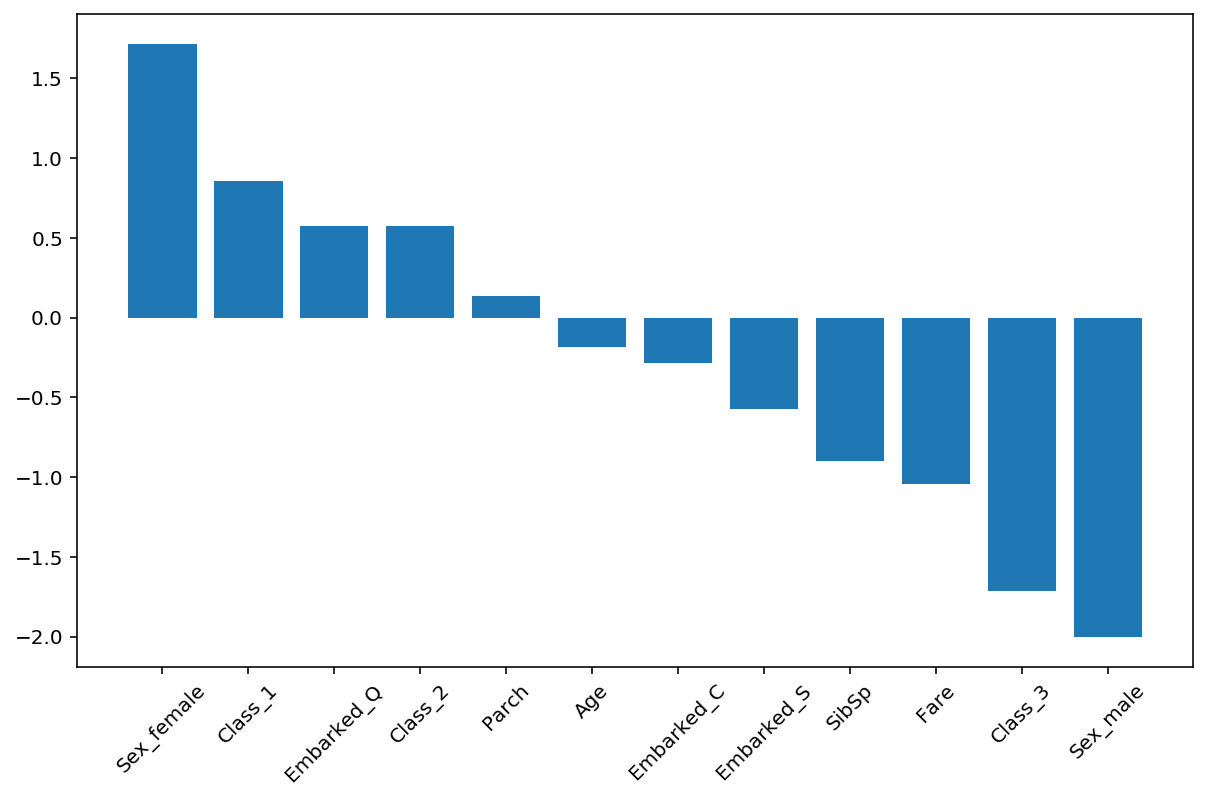

In [ ]:
# 가중치 값을 그래프로 보기
plt.figure(figsize=(10,6))
plt.bar(result.feature, result.weight)
plt.xticks(rotation=45)

- 위 결과를 보면 생존하는데 가장 많이 기여한 변수는 여성, 요금, 1등석 등이고
- 생존하지 않는데 가장 많이 기여한 변수는 남성, 나이, 3등객실 등인 것을 알 수 있다